In [1]:
%matplotlib inline
from __future__ import division
from pickle import load
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
from sklearn.cluster import KMeans
from itertools import permutations
from math import log
#import community

In [2]:
A,ids,G,L,N,evals,Probs = load(open('graph+2.p','r'))

In [3]:
etiqs = {y:x.decode('utf-8') for x,y in ids.iteritems()}
pos = nx.spring_layout(G)

In [4]:
def plot_words(Z,ids):
    import matplotlib.pyplot as plt
    r=0
    plt.scatter(Z[:,0],Z[:,1], marker='o', c='blue')
    for label,x,y in zip(ids, Z[:,0], Z[:,1]):
        plt.annotate(label.decode('utf8'), xy=(x,y), xytext=(-1,1), textcoords='offset points', ha='center', va='bottom')
        r+=1
    plt.show()

In [5]:
def log2(x):
    if x == 0:
        return 0.0
    else:
        return log(x,2)

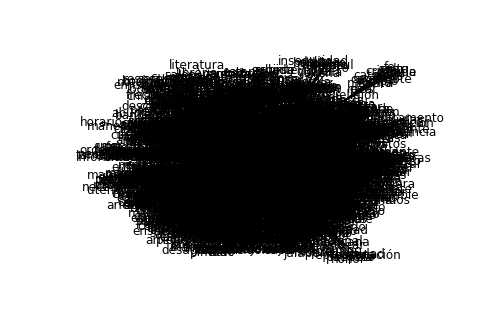

Grupo: 0
	Number of nodes: 2287
	Secon smallest eigenvalue: (0.938191960538+0j)
	Diameter: 6
	Connectivity: 2.00087489064
	Average clustering: 0.0968554999109
	Entropy: 2.93093278625


C:\Users\Windows7\Anaconda2\lib\site-packages\sklearn\utils\validation.py:373: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


	Strength: 0.111762980346


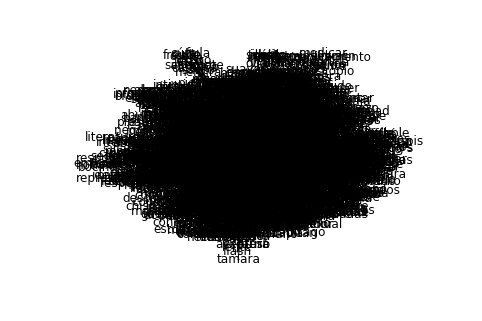

In [6]:
import networkx as nx
from itertools import combinations
from math import log

#nx.draw(G,pos,labels=etiqs,node_size=0,with_labels=True)
nx.draw(G,labels=etiqs,with_labels=True,node_size=1)
plt.show()

for i,c in enumerate(list(nx.connected_components(G))):   
    
    if len(c) > 1: # and len(c) < 100:
        print 'Grupo:', i
        
        sub = []
        for w in c:
            word = etiqs[w]
            
        for x,y in combinations(c,2):
            w1 = etiqs[x]
            w2 = etiqs[y]
            if A[x,y] != 0.0:
                sub.append((x,y,A[x,y]))
            
            #print '\t',w1,w2,P[x,y]
                
        dico = {}
        for x in c:
            dico[x] = etiqs[x]
            
        G1 = nx.Graph()
        G1.add_weighted_edges_from(sub)

        
        n = len(c)
        #print '\tAlgebraic connectivity:', 1/(len(c)*nx.diameter(G1))
     
        A1 = np.array(nx.to_numpy_matrix(G1))
        L1 = np.diag(A1.sum(1)) - A1
        l, v = np.linalg.eig(L1)
        eig = sorted({l[i]:v[i] for i in range(len(l))}.iteritems(), key = itemgetter(0))
        print '\tNumber of nodes:', len(c)
        print '\tSecon smallest eigenvalue:', eig[1][0]
        print '\tDiameter:', nx.diameter(G1)
        print '\tConnectivity:', n/(n-1)*min(np.diag(L1)) 
        print '\tAverage clustering:', nx.average_clustering(G1)
        
        labs = [list(ids.keys())[list(ids.values()).index(x)] for x in dico.keys()]
        U = np.array([x[1] for x in eig][1:3]).T
        
        
        H = 0.0
        Mu = A1.sum(1)*(1/np.sum(A1))
        for a,mu in zip(A1,Mu):
            P = 0.0
            for p_ij in a*(1/sum(a)):
                P += p_ij*log2(p_ij)
            H -= mu*P
            
        print '\tEntropy:', H
        
        
        #Strenght
        from sklearn.cluster import KMeans
        from collections import defaultdict
        
        clusts = defaultdict(list)
        clust = KMeans(n_clusters= int(len(c)/2))        
        clust.fit(U)
        for x,y in zip(clust.labels_,c):
            clusts[x].append(y)
        
        s = 0
        for pi in clusts.values():
            s += len(nx.edge_boundary(G1,pi))
        print '\tStrength:', len(clusts)/(s-1)
        
        

        #print '\tProbability of transitions:'
        #for x,y in combinations(c,2):            
        #    print '\t\t',etiqs[x],etiqs[y],':',Probs[x,y]
        
        nx.draw(G1,labels=dico,with_labels=True,node_size=1)
        plt.show()
        #plot_words(U, labs)
        
        

C:\Users\Windows7\Anaconda2\lib\site-packages\numpy\core\numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


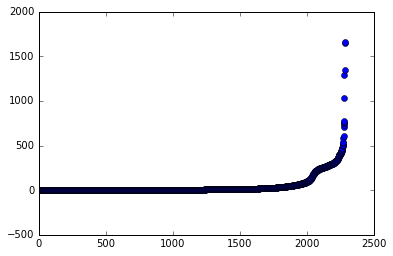

In [7]:
plt.plot(sorted(evals),'o')
plt.show()

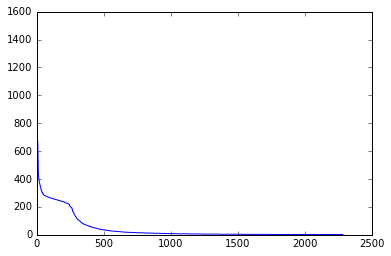

In [8]:
frecs = {}
for w,i in ids.iteritems():
    frecs[w] = sum(A[i])
    
frecs = sorted(frecs.iteritems(), key = itemgetter(1), reverse=True)

plt.plot([f[1] for f in frecs])
#plt.yscale('log')
#plt.xscale('log')
plt.show()

In [9]:
for (w,f) in frecs:
    print w,f

comida 1584.0
agua 1552.0
bebé 1177.0
frío 1156.0
animal 995.0
fruta 692.0
comer 678.0
ropa 666.0
niño 665.0
dormir 577.0
dulce 549.0
casa 522.0
leche 446.0
puerta 445.0
hielo 423.0
dientes 411.0
colores 395.0
sol 392.0
tierra 391.0
árbol 380.0
flor 373.0
volar 371.0
carne 370.0
naranja 366.0
verde 361.0
grande 360.0
cama 349.0
escoba 347.0
café 345.0
rico 341.0
baño 340.0
chocolate 338.0
luz 325.0
gallina 323.0
limpieza 321.0
pastel 320.0
pelota 318.0
mano 316.0
perro 316.0
jabón 309.0
elefante 303.0
cortar 303.0
hot cakes 303.0
queso 298.0
ojos 298.0
silla 297.0
cocina 297.0
araña 293.0
leña 291.0
fresa 290.0
pantalón 288.0
sofá 287.0
huevo 286.0
avión 285.0
plato 284.0
calor 284.0
mamila 282.0
pluma 282.0
cobija 281.0
lavabo 281.0
río 281.0
triciclo 281.0
abrigo 280.0
crayolas 280.0
trapo 279.0
pájaro 279.0
rana 278.0
cuna 278.0
jirafa 278.0
toalla 278.0
ratón 277.0
chupón 276.0
manzana 276.0
escribir 276.0
labios 275.0
reloj 275.0
pan 275.0
taza 274.0
pañal 274.0
shorts 272.0
tijer